<a href="https://colab.research.google.com/github/Seboldju/JS_JR_NK_Softwareentwicklung-Tankstellen/blob/main/Extended_Load_and_preprocess_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Select stations and time period 123


In [2]:
id = "bd27418d-c4fd-4f8a-82e5-d0cbdee60eb7" # ID of the fuel station of interest (Aral Tankstelle Lochäckerstraße 294)
ids_pf = ["0be32f00-8ff4-45bf-bb4c-1588d6e03aa1", "0dc6786a-38e4-4576-8848-335975dea87b", "3fe8dc63-1663-430f-bcc3-5bdbf281d3af", "4153a547-046a-410c-a575-968f21f1ce66", "615f2d73-5214-47f2-8691-e4a8134380bb", "6657358a-cf8c-4d8a-b4ec-a835271041ac","71ee41a5-8e67-4c50-85ab-37b95f1ec76e", "7a8d7a4a-a898-48c1-9420-f4a843d3d32e", "85d87996-9667-4563-be19-7dd758a9a4a0","94fb812e-dae2-4d1e-c4c3-d7837b468dab", "99f5fdc2-80d8-4c38-aa04-6295d0d78f96", "a839b4f0-ec0d-474a-a839-4ada95a6ca8a", "b0e03550-8c80-4917-92e7-db40e975d9f2", "d6e30bca-f474-4e02-aef2-56bd5c2545d9", "fbc4af15-1e1d-46ba-9a44-80c47900f3a5", "22375adc-ed7e-423b-8191-2cd266f6bcd6", "35d5f441-d930-4993-adf4-ee1abdf14000", "51d4b626-a095-1aa0-e100-80009459e03a", "51d4b6b4-a095-1aa0-e100-80009459e03a", "bd27418d-c4fd-4f8a-82e5-d0cbdee60eb7"]
days = 30 # Number of days of interest, counting backwards from today,
# above 200 days requires local engine or Colab Pro, runs out of memory in free version

# Install packages

In [3]:
import datetime
import pandas as pd
import subprocess
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score



# Load data

In [4]:
today = datetime.date.today()
yesterday = today - datetime.timedelta(days=1)
print(yesterday)

2024-06-21


In [5]:
twodaysago = today - datetime.timedelta(days=2)

In [6]:
def linkFromDate(date) :
  link_prefix = "https://dev.azure.com/tankerkoenig/362e70d1-bafa-4cf7-a346-1f3613304973/_apis/git/repositories/0d6e7286-91e4-402c-af56-fa75be1f223d/items?path=/prices/"
  link_datepart = "2024/04/2024-04-23"
  link_datepart = date.strftime('%Y/%m/%Y-%m-%d')
  link_postfix = "-prices.csv"
  link = link_prefix + link_datepart + link_postfix
  return link

In [7]:
link = linkFromDate(twodaysago)

In [8]:
def downloadData(url) :
  command = ["wget", "-O","prices.csv",url]
  result = subprocess.run(command, capture_output=True, text=True)
  # Print the output from the command
  # print("Output:")
  # print(result.stdout)
  # Check for errors
  if result.stderr:
    print("Error:")
    print(result.stderr)

In [9]:
raw_data = None
for i in range(days):
  day = today - datetime.timedelta(days=(days-i))
  # print(day)
  link = linkFromDate(day)
  try:
    downloadData(link)
    df = pd.read_csv("prices.csv")
    # df.date = pd.to_datetime(df.date, format='%Y-%m-%d %H:%M:%S+02', , utc=True)
    df.date = pd.to_datetime(df.date, utc=True)
    if(raw_data is None) :
      raw_data = df
    else :
      raw_data = pd.concat([raw_data, df], ignore_index=True)
  except:
    print("Could not download or process " + link)
raw_data.describe()

Die letzten 5000 Zeilen der Streamingausgabe wurden abgeschnitten.
 23900K .......... .......... .......... .......... .......... 1.07M
 23950K .......... .......... .......... .......... .......... 52.0M
 24000K .......... .......... .......... .......... .......... 38.6M
 24050K .......... .......... .......... .......... .......... 23.5M
 24100K .......... .......... .......... .......... .......... 33.9M
 24150K .......... .......... .......... .......... .......... 35.1M
 24200K .......... .......... .......... .......... .......... 27.7M
 24250K .......... .......... .......... .......... .......... 23.9M
 24300K .......... .......... .......... .......... .......... 37.3M
 24350K .......... .......... .......... .......... .......... 34.6M
 24400K .......... .......... .......... .......... .......... 44.6M
 24450K .......... .......... .......... .......... .......... 9.35M
 24500K .......... .......... .......... .......... .......... 18.9M
 24550K .......... .......... ......

,diesel,e5,e10,dieselchange,e5change,e10change
count,1.237345e+07,1.237345e+07,1.237345e+07,1.237345e+07,1.237345e+07,1.237345e+07
mean,1.642629e+00,1.802364e+00,1.696016e+00,7.825251e-01,7.737767e-01,7.512356e-01
std,5.533065e-02,2.312969e-01,3.612008e-01,4.127700e-01,4.186430e-01,4.325942e-01
min,-1.000000e-03,0.000000e+00,-1.000000e-03,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.609000e+00,1.799000e+00,1.729000e+00,1.000000e+00,1.000000e+00,1.000000e+00
50%,1.639000e+00,1.829000e+00,1.769000e+00,1.000000e+00,1.000000e+00,1.000000e+00
75%,1.669000e+00,1.859000e+00,1.799000e+00,1.000000e+00,1.000000e+00,1.000000e+00
max,4.989000e+00,4.480000e+00,4.449000e+00,3.000000e+00,3.000000e+00,3.000000e+00


In [10]:
raw_data.head(20)

,date,station_uuid,diesel,e5,e10,dieselchange,e5change,e10change
0,2024-05-22 22:00:49+00:00,00060166-0002-4444-8888-acdc00000002,1.669,1.879,1.819,1,1,1
1,2024-05-22 22:00:49+00:00,511b6975-e41b-499b-a770-7438aef5e791,1.609,1.779,1.729,1,0,0
2,2024-05-22 22:00:49+00:00,00061379-0013-4444-8888-acdc00000013,1.679,1.869,1.809,1,1,1
3,2024-05-22 22:00:49+00:00,00061277-0011-4444-8888-acdc00000011,1.679,1.869,1.809,1,1,1
4,2024-05-22 22:01:50+00:00,b78ace98-5bde-4f84-9820-8abd807e9644,1.729,1.929,1.869,1,1,1
5,2024-05-22 22:01:50+00:00,25450d7a-abe5-4cde-bf2f-afd57cb302f6,1.669,1.799,1.739,1,1,1
6,2024-05-22 22:01:50+00:00,d4969cf8-baba-4364-a2b8-59b544ad00ce,1.629,1.849,1.789,1,1,1
7,2024-05-22 22:01:50+00:00,a40f8609-356c-4a23-9a21-97ec53b79ce8,1.669,1.869,1.809,1,1,1
8,2024-05-22 22:01:50+00:00,6bb23c12-f7ce-41a8-ad1c-b50854808fe9,1.639,1.859,1.799,1,0,0
9,2024-05-22 22:01:50+00:00,f272902b-aca8-46a0-ac71-506521a206f4,1.669,1.889,1.829,0,0,1


# Data Cleansing an Preprocessing für die Clusteranalyse



**Datapreprocessing:**

* Filtern des Rohdatensatzes nach Pforzheimer Tankstellen
* Konvertieren der Spalte "date" in die richtige Zeitzone
* Abrunden der Sekunden auf volle Minuten
* Identifikation des Betrachtungszeitraums durch Festlegung des höchsten Datums im Datensatz als end_date und des niedrigsten Datums als start_date
* Erstellung eines neuen DataFrames mit einem Zeitstempel für jede Minute im betrachtungszeitraum
* erneute Spezifikationsmöglichkeit für IDs (falls für die CLusteranalyse nur bestimmte IDs betrachtet werden wollen)* Erweiterung des erstellten DataFrames durch eine Zeile mit jeder Minute für jede der Tankstellen in der ID-Liste
* Verbindung des neuen erweiterten DataFrame mit den ursprünglichen Preisänderungsdaten anhand der Merkmale 'station_uuid' und 'date'
* Auffüllen der leeren Zeilen mit dem letzten bekannten Preis durch den ffill. Hierbei wurde darauf geachtet, dass die Preisänderungsspalten (diesel_change, e10_change, e5_change) nicht aufgefüllt werden, sondern leer bleiben, damit man die ursprünglichen und aufgefüllten Daten im Datensatz unterscheiden kann und die Spaltensumme weiterhin der Anzahl der Änderungen entspricht.
* Anschließend wurde der geupdatete Datensatz mit Originaldaten von Tankerkönig.de abgeglichen, wodurch die Korrektheit der Daten bestätigt werden konnte



In [75]:
import pandas as pd

# Filtern des Datensatzes nach den IDs in ids_pf
data_cluster = raw_data[raw_data['station_uuid'].isin(ids_pf)]
data_cluster['date'] = pd.to_datetime(data_cluster['date'], utc=True).dt.tz_convert('Europe/Berlin')

# Runden der Sekunden auf volle Minuten
data_cluster['date'] = data_cluster['date'].dt.floor('T')

# Definiere den Zeitraum
start_date = data_cluster['date'].min().floor('D')
end_date = data_cluster['date'].max().ceil('D')

# Erstelle einen DataFrame mit einem Zeitstempel für jede Minute im betrachteten Zeitraum
all_minutes = pd.date_range(start=start_date, end=end_date, freq='T', tz='Europe/Berlin')
all_minutes_df = pd.DataFrame(all_minutes, columns=['date'])

# Liste der spezifischen Tankstellen-IDs
station_ids = ["0be32f00-8ff4-45bf-bb4c-1588d6e03aa1", "0dc6786a-38e4-4576-8848-335975dea87b", "3fe8dc63-1663-430f-bcc3-5bdbf281d3af", "4153a547-046a-410c-a575-968f21f1ce66", "615f2d73-5214-47f2-8691-e4a8134380bb", "6657358a-cf8c-4d8a-b4ec-a835271041ac","71ee41a5-8e67-4c50-85ab-37b95f1ec76e", "7a8d7a4a-a898-48c1-9420-f4a843d3d32e", "85d87996-9667-4563-be19-7dd758a9a4a0","94fb812e-dae2-4d1e-c4c3-d7837b468dab", "99f5fdc2-80d8-4c38-aa04-6295d0d78f96", "a839b4f0-ec0d-474a-a839-4ada95a6ca8a", "b0e03550-8c80-4917-92e7-db40e975d9f2", "d6e30bca-f474-4e02-aef2-56bd5c2545d9", "fbc4af15-1e1d-46ba-9a44-80c47900f3a5", "22375adc-ed7e-423b-8191-2cd266f6bcd6", "35d5f441-d930-4993-adf4-ee1abdf14000", "51d4b626-a095-1aa0-e100-80009459e03a", "51d4b6b4-a095-1aa0-e100-80009459e03a", "bd27418d-c4fd-4f8a-82e5-d0cbdee60eb7"]

# Erstelle einen DataFrame mit einer Zeile für jede Minute und jede dieser spezifischen Tankstellen
expanded_df = pd.concat([all_minutes_df.assign(station_uuid=station_id) for station_id in station_ids], ignore_index=True)

# Merge der erweiterten Daten mit den Preisänderungsdaten
merged_df = pd.merge(expanded_df, data_cluster, on=['date', 'station_uuid'], how='left')

# Definiere die Spalten, die gefüllt werden sollen
price_columns = ['diesel', 'e5', 'e10']

# Gruppiere nach Tankstellen-ID und fülle die fehlenden Werte auf, ohne die Änderungs-Spalten zu beeinflussen
for station_id in station_ids:
    station_data = merged_df[merged_df['station_uuid'] == station_id].copy()
    station_data[price_columns] = station_data[price_columns].fillna(method='ffill').fillna(0)

    # Update nur die Preis-Spalten im ursprünglichen DataFrame
    merged_df.loc[merged_df['station_uuid'] == station_id, price_columns] = station_data[price_columns]

# Zeige die ersten paar Zeilen des aufgefüllten DataFrames
print(merged_df.head())


<ipython-input-75-de3b8acc4367>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cluster['date'] = pd.to_datetime(data_cluster['date'], utc=True).dt.tz_convert('Europe/Berlin')
<ipython-input-75-de3b8acc4367>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cluster['date'] = data_cluster['date'].dt.floor('T')


                       date                          station_uuid  diesel  \
0 2024-05-23 00:00:00+02:00  0be32f00-8ff4-45bf-bb4c-1588d6e03aa1     0.0   
1 2024-05-23 00:01:00+02:00  0be32f00-8ff4-45bf-bb4c-1588d6e03aa1     0.0   
2 2024-05-23 00:02:00+02:00  0be32f00-8ff4-45bf-bb4c-1588d6e03aa1     0.0   
3 2024-05-23 00:03:00+02:00  0be32f00-8ff4-45bf-bb4c-1588d6e03aa1     0.0   
4 2024-05-23 00:04:00+02:00  0be32f00-8ff4-45bf-bb4c-1588d6e03aa1     0.0   

    e5  e10  dieselchange  e5change  e10change  
0  0.0  0.0           NaN       NaN        NaN  
1  0.0  0.0           NaN       NaN        NaN  
2  0.0  0.0           NaN       NaN        NaN  
3  0.0  0.0           NaN       NaN        NaN  
4  0.0  0.0           NaN       NaN        NaN  


**Extraktion von Stunde, Wochentag und Minute als neue Spalten**

Stunde, Wochentag und Minute werden aus der konvertierte 'date'-Spalte extrahiert, was spätere Gruppierungen erleichtern soll.

In [76]:
# Extrahierung der Stunde, Wochentag und Minute aus der konvertierten 'date'-Spalte
merged_df['hour'] = merged_df['date'].dt.hour
merged_df['weekday'] = merged_df['date'].dt.weekday
merged_df['minute'] = merged_df['date'].dt.minute

print(merged_df.head())

                       date                          station_uuid  diesel  \
0 2024-05-23 00:00:00+02:00  0be32f00-8ff4-45bf-bb4c-1588d6e03aa1     0.0   
1 2024-05-23 00:01:00+02:00  0be32f00-8ff4-45bf-bb4c-1588d6e03aa1     0.0   
2 2024-05-23 00:02:00+02:00  0be32f00-8ff4-45bf-bb4c-1588d6e03aa1     0.0   
3 2024-05-23 00:03:00+02:00  0be32f00-8ff4-45bf-bb4c-1588d6e03aa1     0.0   
4 2024-05-23 00:04:00+02:00  0be32f00-8ff4-45bf-bb4c-1588d6e03aa1     0.0   

    e5  e10  dieselchange  e5change  e10change  hour  weekday  minute  
0  0.0  0.0           NaN       NaN        NaN     0        3       0  
1  0.0  0.0           NaN       NaN        NaN     0        3       1  
2  0.0  0.0           NaN       NaN        NaN     0        3       2  
3  0.0  0.0           NaN       NaN        NaN     0        3       3  
4  0.0  0.0           NaN       NaN        NaN     0        3       4  


**Umbenennung der uu_id-Spalte...**

...in den Namen der Tankstelle, zur besseren Lesbarkeit

In [81]:
# Mapping der Station UUIDs zu den neuen Namen
station_names = {
    "0be32f00-8ff4-45bf-bb4c-1588d6e03aa1": "Tankcenter_Wurmberger",
    "0dc6786a-38e4-4576-8848-335975dea87b": "Aral_Armsel",
    "3fe8dc63-1663-430f-bcc3-5bdbf281d3af": "BFT_Haupt",
    "4153a547-046a-410c-a575-968f21f1ce66": "Aral_Karlsruher",
    "615f2d73-5214-47f2-8691-e4a8134380bb": "Access_Calwer",
    "6657358a-cf8c-4d8a-b4ec-a835271041ac": "ENI_Karlsruher",
    "71ee41a5-8e67-4c50-85ab-37b95f1ec76e": "Shell_Zerrenner",
    "7a8d7a4a-a898-48c1-9420-f4a843d3d32e": "SB_Eutinger",
    "85d87996-9667-4563-be19-7dd758a9a4a0": "Esso_KaiserFriedrich",
    "94fb812e-dae2-4d1e-c4c3-d7837b468dab": "TP_Braetzingen",
    "99f5fdc2-80d8-4c38-aa04-6295d0d78f96": "Esso_Calwer",
    "a839b4f0-ec0d-474a-a839-4ada95a6ca8a": "ENI_Hirsauer",
    "b0e03550-8c80-4917-92e7-db40e975d9f2": "Shell_Buchbusch",
    "d6e30bca-f474-4e02-aef2-56bd5c2545d9": "Aral_KaiserFriedrich",
    "fbc4af15-1e1d-46ba-9a44-80c47900f3a5": "Total_Breslauer",
    "22375adc-ed7e-423b-8191-2cd266f6bcd6": "MastOehlert_Blaecher",
    "35d5f441-d930-4993-adf4-ee1abdf14000": "Shell_Wilferdinger",
    "51d4b626-a095-1aa0-e100-80009459e03a": "JET_Karlsruher",
    "51d4b6b4-a095-1aa0-e100-80009459e03a": "JET_Luisen",
    "bd27418d-c4fd-4f8a-82e5-d0cbdee60eb7": "Aral_Lochaecker"
}

# Ersetzen der station_uuid durch die neuen Namen
merged_df['station_uuid'] = merged_df['station_uuid'].map(station_names).fillna(merged_df['station_uuid'])

# Ersetzen von Nullwerten in den Preis-Spalten durch NaN, da die Minimalpreise sonst aufgrund fehlender Werte verfälscht werden würden
merged_df[price_columns] = merged_df[price_columns].replace(0, np.nan)

# Anzeigen der ersten paar Zeilen des DataFrames zur Überprüfung
print(merged_df)


                            date           station_uuid  diesel     e5    e10  \
0      2024-05-23 00:00:00+02:00  Tankcenter_Wurmberger     NaN    NaN    NaN   
1      2024-05-23 00:01:00+02:00  Tankcenter_Wurmberger     NaN    NaN    NaN   
2      2024-05-23 00:02:00+02:00  Tankcenter_Wurmberger     NaN    NaN    NaN   
3      2024-05-23 00:03:00+02:00  Tankcenter_Wurmberger     NaN    NaN    NaN   
4      2024-05-23 00:04:00+02:00  Tankcenter_Wurmberger     NaN    NaN    NaN   
...                          ...                    ...     ...    ...    ...   
864015 2024-06-21 23:56:00+02:00        Aral_Lochaecker   1.679  1.849  1.789   
864016 2024-06-21 23:57:00+02:00        Aral_Lochaecker   1.679  1.849  1.789   
864017 2024-06-21 23:58:00+02:00        Aral_Lochaecker   1.679  1.849  1.789   
864018 2024-06-21 23:59:00+02:00        Aral_Lochaecker   1.679  1.849  1.789   
864019 2024-06-22 00:00:00+02:00        Aral_Lochaecker   1.679  1.849  1.789   

        dieselchange  e5cha

**Validierung der Daten**

Der neu erstellte Datensatz wurde als CSV-Datei exportiert und mit Daten von Tankerkönig.de abgeglichen.

In [88]:
from google.colab import files
.to_csv('Datensatz_Cluster1.csv', index=False)
files.download('Datensatz_Cluster1.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**Vorbereitende Berechnungen für die Clusteranalyse//Ergänzen weiterer Metriken**

---



Zunächst hinzufügen von neuen Spalten, welche die Preisänderungen der kraftstoffe ausgeben

In [83]:
# Berechnung der Preisänderungen
merged_df['diesel_change_value'] = merged_df.groupby('station_uuid')['diesel'].diff()
merged_df['e5_change_value'] = merged_df.groupby('station_uuid')['e5'].diff()
merged_df['e10_change_value'] = merged_df.groupby('station_uuid')['e10'].diff()

# Zeige die ersten paar Zeilen des aktualisierten DataFrames an
print(merged_df)


                            date           station_uuid  diesel     e5    e10  \
0      2024-05-23 00:00:00+02:00  Tankcenter_Wurmberger     NaN    NaN    NaN   
1      2024-05-23 00:01:00+02:00  Tankcenter_Wurmberger     NaN    NaN    NaN   
2      2024-05-23 00:02:00+02:00  Tankcenter_Wurmberger     NaN    NaN    NaN   
3      2024-05-23 00:03:00+02:00  Tankcenter_Wurmberger     NaN    NaN    NaN   
4      2024-05-23 00:04:00+02:00  Tankcenter_Wurmberger     NaN    NaN    NaN   
...                          ...                    ...     ...    ...    ...   
864015 2024-06-21 23:56:00+02:00        Aral_Lochaecker   1.679  1.849  1.789   
864016 2024-06-21 23:57:00+02:00        Aral_Lochaecker   1.679  1.849  1.789   
864017 2024-06-21 23:58:00+02:00        Aral_Lochaecker   1.679  1.849  1.789   
864018 2024-06-21 23:59:00+02:00        Aral_Lochaecker   1.679  1.849  1.789   
864019 2024-06-22 00:00:00+02:00        Aral_Lochaecker   1.679  1.849  1.789   

        dieselchange  e5cha

Hinzufügen der Zeit seit der letzten Preisänderung für jede Kraftstoffart

In [87]:
# Sicherstellen, dass das Datum als Datetime-Objekt vorliegt
merged_df['date'] = pd.to_datetime(merged_df['date'])

# Berechnung der Zeitdifferenz zu den Zeitstempeln, an denen eine Preisänderung stattgefunden hat
def calculate_time_diff(df, price_change_col):
    # Zeitdifferenz nur zu den Zeilen mit Preisänderungen berechnen
    df['change_time'] = df['date'].where(df[price_change_col] == 1)
    df['change_time'] = df['change_time'].fillna(method='ffill')
    time_diff = (df['date'] - df['change_time']).dt.total_seconds() / 60  # in Minuten
    return time_diff

# Berechnung der Zeitdifferenzen für Diesel, E5 und E10
merged_df['time_since_last_change_diesel'] = merged_df.groupby('station_uuid').apply(lambda x: calculate_time_diff(x, 'dieselchange')).reset_index(level=0, drop=True)
merged_df['time_since_last_change_e5'] = merged_df.groupby('station_uuid').apply(lambda x: calculate_time_diff(x, 'e5change')).reset_index(level=0, drop=True)
merged_df['time_since_last_change_e10'] = merged_df.groupby('station_uuid').apply(lambda x: calculate_time_diff(x, 'e10change')).reset_index(level=0, drop=True)

# Entfernen der temporären Spalte 'change_time'
merged_df.drop(columns=['change_time'], inplace=True, errors='ignore')

# Zeige die ersten paar Zeilen des aktualisierten DataFrames an
print(merged_df.head())


                       date           station_uuid  diesel  e5  e10  \
0 2024-05-23 00:00:00+02:00  Tankcenter_Wurmberger     NaN NaN  NaN   
1 2024-05-23 00:01:00+02:00  Tankcenter_Wurmberger     NaN NaN  NaN   
2 2024-05-23 00:02:00+02:00  Tankcenter_Wurmberger     NaN NaN  NaN   
3 2024-05-23 00:03:00+02:00  Tankcenter_Wurmberger     NaN NaN  NaN   
4 2024-05-23 00:04:00+02:00  Tankcenter_Wurmberger     NaN NaN  NaN   

   dieselchange  e5change  e10change  hour  weekday  ...  e10_change_value  \
0           NaN       NaN        NaN     0        3  ...               NaN   
1           NaN       NaN        NaN     0        3  ...               NaN   
2           NaN       NaN        NaN     0        3  ...               NaN   
3           NaN       NaN        NaN     0        3  ...               NaN   
4           NaN       NaN        NaN     0        3  ...               NaN   

   time_since_last_change_diesel  time_since_last_change_e5  \
0                            NaN         

Hinzufügen von Spalten, die Angeben, ob der Kraftstoffpreis gestiegen oder gesunken ist, um daraus das Verhältnis von Preissenkungen zu Preiserhöhungen zu berechnen

In [85]:
# Anzeigen ob der Kraftstoffpreis steigt oder fällt, für die Berechnung des Verhältnisses von Preissenkungen zu Preiserhöhungen
merged_df['diesel_increase'] = (merged_df['diesel_change_value'] > 0).astype(int)
merged_df['diesel_decrease'] = (merged_df['diesel_change_value'] < 0).astype(int)

merged_df['e5_increase'] = (merged_df['e5_change_value'] > 0).astype(int)
merged_df['e5_decrease'] = (merged_df['e5_change_value'] < 0).astype(int)

merged_df['e10_increase'] = (merged_df['e10_change_value'] > 0).astype(int)
merged_df['e10_decrease'] = (merged_df['e10_change_value'] < 0).astype(int)

# Zeige die ersten paar Zeilen des aktualisierten DataFrames an
print(merged_df.head())


                       date           station_uuid  diesel  e5  e10  \
0 2024-05-23 00:00:00+02:00  Tankcenter_Wurmberger     NaN NaN  NaN   
1 2024-05-23 00:01:00+02:00  Tankcenter_Wurmberger     NaN NaN  NaN   
2 2024-05-23 00:02:00+02:00  Tankcenter_Wurmberger     NaN NaN  NaN   
3 2024-05-23 00:03:00+02:00  Tankcenter_Wurmberger     NaN NaN  NaN   
4 2024-05-23 00:04:00+02:00  Tankcenter_Wurmberger     NaN NaN  NaN   

   dieselchange  e5change  e10change  hour  weekday  ...  e10_change_value  \
0           NaN       NaN        NaN     0        3  ...               NaN   
1           NaN       NaN        NaN     0        3  ...               NaN   
2           NaN       NaN        NaN     0        3  ...               NaN   
3           NaN       NaN        NaN     0        3  ...               NaN   
4           NaN       NaN        NaN     0        3  ...               NaN   

   time_since_last_change_diesel  time_since_last_change_e5  \
0                            NaN         

**Berechnung der Häufigkeit der Preisänderungen pro Tag**

Diese Metrik gibt uns Auskunft darüber, wie oft eine Tankstelle ihre Preise täglich ändert

In [138]:
# Berechnung der Häufigkeit der Preisänderungen pro Tag für Diesel, E5 und E10
merged_df['date_only'] = merged_df['date'].dt.date

price_change_frequency_diesel = merged_df[merged_df['dieselchange'] == 1].groupby(['station_uuid', 'date_only']).size().groupby('station_uuid').mean()
price_change_frequency_e5 = merged_df[merged_df['e5change'] == 1].groupby(['station_uuid', 'date_only']).size().groupby('station_uuid').mean()
price_change_frequency_e10 = merged_df[merged_df['e10change'] == 1].groupby(['station_uuid', 'date_only']).size().groupby('station_uuid').mean()

price_change_frequency_df = pd.DataFrame({
    'price_change_frequency_diesel': price_change_frequency_diesel,
    'price_change_frequency_e5': price_change_frequency_e5,
    'price_change_frequency_e10': price_change_frequency_e10
})
price_change_frequency_df = price_change_frequency_df.add_suffix('_avg_number_of_changes_per_day')
print(price_change_frequency_df.head())

                      price_change_frequency_diesel_avg_number_of_changes_per_day  \
station_uuid                                                                        
Access_Calwer                                                 20.600000             
Aral_Armsel                                                   21.666667             
Aral_KaiserFriedrich                                          17.766667             
Aral_Karlsruher                                               24.866667             
Aral_Lochaecker                                               22.733333             

                      price_change_frequency_e5_avg_number_of_changes_per_day  \
station_uuid                                                                    
Access_Calwer                                                 20.133333         
Aral_Armsel                                                   23.333333         
Aral_KaiserFriedrich                                          20.633333         

**Berechnung der durchschnittlichen Dauer zwischen Preisänderungen**

Diese Metrik zeigt uns, wie lange es im Durchschnitt dauert, bis eine Tankstelle ihre Preise ändert

In [139]:
# Durchschnittliche Dauer zwischen Preisänderungen berechnen
average_time_between_changes_diesel = merged_df.groupby('station_uuid')['time_since_last_change_diesel'].mean()
average_time_between_changes_e5 = merged_df.groupby('station_uuid')['time_since_last_change_e5'].mean()
average_time_between_changes_e10 = merged_df.groupby('station_uuid')['time_since_last_change_e10'].mean()

average_time_between_changes_df = pd.DataFrame({
    'average_time_between_changes_diesel': average_time_between_changes_diesel,
    'average_time_between_changes_e5': average_time_between_changes_e5,
    'average_time_between_changes_e10': average_time_between_changes_e10
})

average_time_between_changes_df = average_time_between_changes_df.add_suffix('_in_minutes')

print(average_time_between_changes_df.head())


                      average_time_between_changes_diesel_in_minutes  \
station_uuid                                                           
Access_Calwer                                             136.085181   
Aral_Armsel                                                93.681235   
Aral_KaiserFriedrich                                       92.763823   
Aral_Karlsruher                                            77.615688   
Aral_Lochaecker                                            93.530769   

                      average_time_between_changes_e5_in_minutes  \
station_uuid                                                       
Access_Calwer                                         135.983379   
Aral_Armsel                                            90.086480   
Aral_KaiserFriedrich                                   88.894545   
Aral_Karlsruher                                        74.572937   
Aral_Lochaecker                                        92.536713   

                  

**Berechnung des prozentualen Anteils der Preiserhöhungen und -senkungen**

Diese Metrik gibt uns Einblicke, wie oft eine Tankstelle ihre Preise erhöht oder senkt

In [93]:
# Berechnung des Anteils der Preiserhöhungen und -senkungen
total_price_changes_diesel = merged_df.groupby('station_uuid')['dieselchange'].sum()
total_price_changes_e5 = merged_df.groupby('station_uuid')['e5change'].sum()
total_price_changes_e10 = merged_df.groupby('station_uuid')['e10change'].sum()

price_increase_percentage_diesel = merged_df.groupby('station_uuid')['diesel_increase'].sum() / total_price_changes_diesel
price_decrease_percentage_diesel = merged_df.groupby('station_uuid')['diesel_decrease'].sum() / total_price_changes_diesel

price_increase_percentage_e5 = merged_df.groupby('station_uuid')['e5_increase'].sum() / total_price_changes_e5
price_decrease_percentage_e5 = merged_df.groupby('station_uuid')['e5_decrease'].sum() / total_price_changes_e5

price_increase_percentage_e10 = merged_df.groupby('station_uuid')['e10_increase'].sum() / total_price_changes_e10
price_decrease_percentage_e10 = merged_df.groupby('station_uuid')['e10_decrease'].sum() / total_price_changes_e10

price_change_percentage_df = pd.DataFrame({
    'price_increase_percentage_diesel': price_increase_percentage_diesel,
    'price_decrease_percentage_diesel': price_decrease_percentage_diesel,
    'price_increase_percentage_e5': price_increase_percentage_e5,
    'price_decrease_percentage_e5': price_decrease_percentage_e5,
    'price_increase_percentage_e10': price_increase_percentage_e10,
    'price_decrease_percentage_e10': price_decrease_percentage_e10
})

print(price_change_percentage_df.head())


                      price_increase_percentage_diesel  \
station_uuid                                             
Access_Calwer                                 0.370550   
Aral_Armsel                                   0.367692   
Aral_KaiserFriedrich                          0.448405   
Aral_Karlsruher                               0.320375   
Aral_Lochaecker                               0.343109   

                      price_decrease_percentage_diesel  \
station_uuid                                             
Access_Calwer                                 0.627832   
Aral_Armsel                                   0.630769   
Aral_KaiserFriedrich                          0.549719   
Aral_Karlsruher                               0.678284   
Aral_Lochaecker                               0.655425   

                      price_increase_percentage_e5  \
station_uuid                                         
Access_Calwer                             0.382450   
Aral_Armsel             

**Berechnung der durchschnittlichen Preisänderungshöhe pro Änderungstyp (Erhöhung vs. Senkung)**

Diese Metrik zeigt uns die durchschnittliche Höhe der Preisänderungen bei Erhöhungen und Senkungen

In [140]:
# Berechnung der durchschnittlichen Preisänderungshöhe pro Änderungstyp
average_increase_amount_diesel = merged_df[merged_df['diesel_increase'] == 1].groupby('station_uuid')['diesel_change_value'].mean()
average_decrease_amount_diesel = merged_df[merged_df['diesel_decrease'] == 1].groupby('station_uuid')['diesel_change_value'].mean()

average_increase_amount_e5 = merged_df[merged_df['e5_increase'] == 1].groupby('station_uuid')['e5_change_value'].mean()
average_decrease_amount_e5 = merged_df[merged_df['e5_decrease'] == 1].groupby('station_uuid')['e5_change_value'].mean()

average_increase_amount_e10 = merged_df[merged_df['e10_increase'] == 1].groupby('station_uuid')['e10_change_value'].mean()
average_decrease_amount_e10 = merged_df[merged_df['e10_decrease'] == 1].groupby('station_uuid')['e10_change_value'].mean()

average_change_amount_df = pd.DataFrame({
    'average_increase_amount_diesel': average_increase_amount_diesel,
    'average_decrease_amount_diesel': average_decrease_amount_diesel,
    'average_increase_amount_e5': average_increase_amount_e5,
    'average_decrease_amount_e5': average_decrease_amount_e5,
    'average_increase_amount_e10': average_increase_amount_e10,
    'average_decrease_amount_e10': average_decrease_amount_e10
})

average_change_amount_df = average_change_amount_df.add_suffix('_in_Euro')

print(average_change_amount_df.head())


                      average_increase_amount_diesel_in_Euro  \
station_uuid                                                   
Access_Calwer                                       0.044410   
Aral_Armsel                                         0.056234   
Aral_KaiserFriedrich                                0.056192   
Aral_Karlsruher                                     0.055732   
Aral_Lochaecker                                     0.058846   

                      average_decrease_amount_diesel_in_Euro  \
station_uuid                                                   
Access_Calwer                                      -0.026160   
Aral_Armsel                                        -0.032951   
Aral_KaiserFriedrich                               -0.045904   
Aral_Karlsruher                                    -0.026423   
Aral_Lochaecker                                    -0.030872   

                      average_increase_amount_e5_in_Euro  \
station_uuid                              

Erstellen von Berechnungen und Zusammenführung der Ergebnisse in einem DataFrame.

Für die Clusteranalyse wurden folgende Berechnungen für jede Tankstelle und Kraftstoffart durchgeführt, mit der Intention daraus erste Rückschlüsse auf die Preisstrategie  ziehen zu können (Allgmeines Preisniveau, Preisniveau nach Tageszeiten, Preisschwankungen, Extremwerte etc.):

* Durchschnittspreise nach Stunde
* Durchschnittspreise nach Wochentag
* Minimalpreis nach Stunde
* Minimalpreis nach Wochentag
* Maximalpreis nach Stunde
* Maximalpreis nach Wochentag
* Standardabweichung
* Anzahl der Preisänderungen



In [66]:
# Entfernen der nicht-numerischen Spalten vor der Gruppierung
price_columns = ['diesel', 'e5', 'e10']
change_columns = ['dieselchange', 'e10change', 'e5change']

# Ersetzen von Nullwerten in den Preis-Spalten durch NaN, da die Minimalpreise sonst aufgrund fehlender Werte verfälscht werden würden
merged_df[price_columns] = merged_df[price_columns].replace(0, np.nan)

# Durchschnittspreise nach Stunde und Wochentag
avg_price_by_hour = merged_df.groupby(['station_uuid', 'hour'])[price_columns].mean().unstack().add_suffix('_avg_price_by_hour_in_Euro')
avg_price_by_weekday = merged_df.groupby(['station_uuid', 'weekday'])[price_columns].mean().unstack().add_suffix('_avg_price_by_weekday_in_Euro')

min_price_by_hour = merged_df.groupby(['station_uuid', 'hour'])[price_columns].min().unstack().add_suffix('_min_price_by_hour_in_Euro')
max_price_by_hour = merged_df.groupby(['station_uuid', 'hour'])[price_columns].max().unstack().add_suffix('_max_price_by_hour_in_Euro')
min_price_by_weekday = merged_df.groupby(['station_uuid', 'weekday'])[price_columns].min().unstack().add_suffix('_min_price_by_weekday_in_Euro')
max_price_by_weekday = merged_df.groupby(['station_uuid', 'weekday'])[price_columns].max().unstack().add_suffix('_max_price_by_weekday_in_Euro')

std_price = merged_df.groupby('station_uuid')[price_columns].std().add_suffix('_std_in_Euro')
price_changes = merged_df.groupby('station_uuid')[change_columns].sum().add_suffix('_total_num_changes')


                      (diesel_hour, 0_hour)  (diesel_hour, 1_hour)  \
station_uuid                                                         
Access_Calwer                      1.602130               1.602103   
Aral_Armsel                        1.613842               1.613828   
Aral_KaiserFriedrich               1.659362               1.659345   
Aral_Karlsruher                    1.627983               1.627966   
Aral_Lochaecker                    1.655910               1.655897   

                      (diesel_hour, 2_hour)  (diesel_hour, 3_hour)  \
station_uuid                                                         
Access_Calwer                      1.602103               1.602103   
Aral_Armsel                        1.613828               1.613828   
Aral_KaiserFriedrich               1.659345               1.659345   
Aral_Karlsruher                    1.627966               1.627966   
Aral_Lochaecker                    1.655897               1.655897   

                  

Diese Analyse von Stoßzeiten soll zusätzliche Einblicke in die Preisstrategien der Tankstellen bieten, insbesondere zu Zeiten, in denen die Nachfrage möglicherweise höher ist.

Wir unterteilen den Tag in mehrere Abschnitte und berechnen Metriken speziell für diese Abschnitte. Typische Stoßzeiten könnten zum Beispiel die folgenden sein:

Morgens (Berufsverkehr): 6:00 - 9:00 Uhr
Mittags: 11:00 - 14:00 Uhr
Abends (Berufsverkehr): 16:00 - 19:00 Uhr

Metriken während Stoßzeiten:
Durchschnittliche Preise während der Stoßzeiten
Anzahl der Preisänderungen während der Stoßzeiten
Häufigkeit der Preisänderungen während der Stoßzeiten
Durchschnittliche Preisänderungshöhe während der Stoßzeiten


In [122]:
import pandas as pd
import numpy as np

# Definieren der Stoßzeiten
rush_hours = {
    'morning': (6, 9),
    'midday': (11, 14),
    'evening': (16, 19)
}

# Funktion zur Berechnung der Metriken während Stoßzeiten
def calculate_rush_hour_metrics(df, rush_hours, price_columns, change_columns):
    rush_hour_metrics = {}

    for period, (start_hour, end_hour) in rush_hours.items():
        period_df = df[(df['hour'] >= start_hour) & (df['hour'] < end_hour)]

        avg_prices = period_df.groupby('station_uuid')[price_columns].mean().add_suffix(f'_{period}_avg_price_in_Euro')
        num_changes = period_df.groupby('station_uuid')[change_columns].sum().add_suffix(f'_{period}_num_changes')

        rush_hour_metrics[period] = avg_prices.join(num_changes)

    return pd.concat(rush_hour_metrics.values(), axis=1)

# Berechnung der Metriken während Stoßzeiten
rush_hour_metrics_df = calculate_rush_hour_metrics(merged_df, rush_hours, price_columns, change_columns)

print(rush_hour_metrics_df.head())


                      diesel_morning_avg_price_in_Euro  \
station_uuid                                             
Access_Calwer                                 1.639684   
Aral_Armsel                                   1.659430   
Aral_KaiserFriedrich                          1.674470   
Aral_Karlsruher                               1.679394   
Aral_Lochaecker                               1.679320   

                      e5_morning_avg_price_in_Euro  \
station_uuid                                         
Access_Calwer                             1.816662   
Aral_Armsel                               1.843893   
Aral_KaiserFriedrich                      1.848067   
Aral_Karlsruher                           1.850372   
Aral_Lochaecker                           1.853652   

                      e10_morning_avg_price_in_Euro  \
station_uuid                                          
Access_Calwer                              1.756662   
Aral_Armsel                                1.7838

**Zusammenführen aller Metriken in einem DataFrame**

In [124]:
# Zusammenführen aller berechneten Metriken in einem DataFrame
features_df = avg_price_by_hour.join([
    avg_price_by_weekday, min_price_by_hour, max_price_by_hour,
    min_price_by_weekday, max_price_by_weekday, std_price, price_changes,
    price_change_frequency_df, average_time_between_changes_df,
    price_change_percentage_df, average_change_amount_df,
    rush_hour_metrics_df
])

print(features_df.head())

                      (diesel_avg_hour_in_Euro, 0_avg_hour_in_Euro)  \
station_uuid                                                          
Access_Calwer                                              1.602130   
Aral_Armsel                                                1.613842   
Aral_KaiserFriedrich                                       1.659362   
Aral_Karlsruher                                            1.627983   
Aral_Lochaecker                                            1.655910   

                      (diesel_avg_hour_in_Euro, 1_avg_hour_in_Euro)  \
station_uuid                                                          
Access_Calwer                                              1.602103   
Aral_Armsel                                                1.613828   
Aral_KaiserFriedrich                                       1.659345   
Aral_Karlsruher                                            1.627966   
Aral_Lochaecker                                            1.655897   

    

**Normalisierung der Daten**

Aufgrund eines Fehler, der besagte dass die Spaltennamen Strings sein müssen, wurden diese konvertiert.

Anschließend wurden die Daten normalisiert, um sie für die Clusternalyse nutzen zu können.

In [125]:
from sklearn.preprocessing import StandardScaler

# Konvertieren der Spaltennamen in Strings
features_df.columns = features_df.columns.map(str)

# Normalisierung der Daten
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features_df)

# Erstellen eines DataFrames aus den skalierten Daten
features_scaled_df = pd.DataFrame(features_scaled, index=features_df.index, columns=features_df.columns)

# Zeige die ersten paar Zeilen des skalierten DataFrames
print(features_scaled_df.head())



                      ('diesel_avg_hour_in_Euro', '0_avg_hour_in_Euro')  \
station_uuid                                                              
Access_Calwer                                                 -0.101142   
Aral_Armsel                                                    0.173135   
Aral_KaiserFriedrich                                           1.239171   
Aral_Karlsruher                                                0.504312   
Aral_Lochaecker                                                1.158327   

                      ('diesel_avg_hour_in_Euro', '1_avg_hour_in_Euro')  \
station_uuid                                                              
Access_Calwer                                                 -0.093785   
Aral_Armsel                                                    0.178832   
Aral_KaiserFriedrich                                           1.237228   
Aral_Karlsruher                                                0.507576   
Aral_Lochaecker         

**Bestimmung der optimalen Anzahl der Cluster mittels Elbow-Methode**

Der Elbow-Plot zeigt, dass sich die Kurve bei etwa 3 oder 4 Clustern zu stabilisieren beginnt. Das bedeutet, dass die optimale Anzahl der Cluster wahrscheinlich 3 oder 4 ist. Es ist klar, dass der größte Unterschied in der WCSS zwischen 1 und 3 Clustern liegt, danach nimmt der Nutzen ab.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

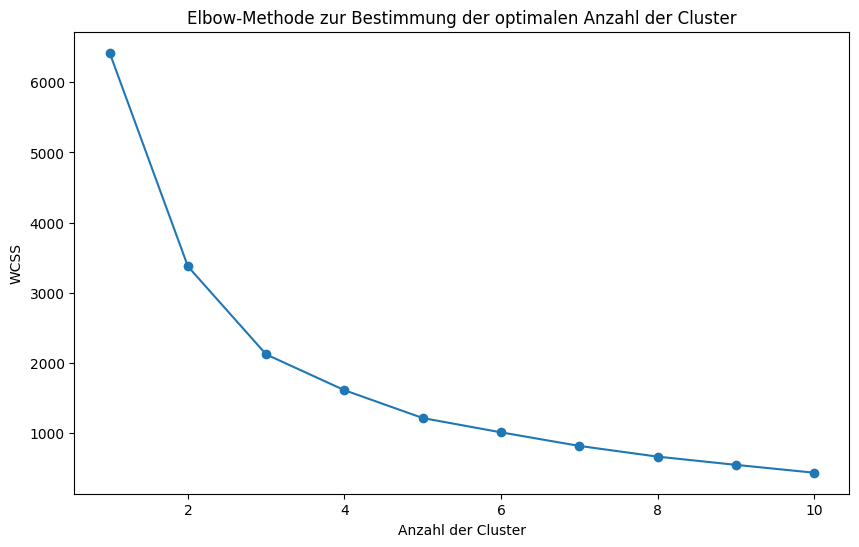

In [126]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Bestimmung der optimalen Anzahl der Cluster mit der Elbow-Methode
wcss = []  # Within-cluster sum of squares
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(features_scaled_df)
    wcss.append(kmeans.inertia_)

# Plot der Elbow-Methode
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow-Methode zur Bestimmung der optimalen Anzahl der Cluster')
plt.xlabel('Anzahl der Cluster')
plt.ylabel('WCSS')
plt.show()


**Durchführung der Clusteranalyse**

Die Clusteranalyse wurde mithilfe von kmeans durchgeführt. Als optimale Clusterzahl wurde gemäß der Elbow-Methode 3 gewählt.

In [136]:
# K-Means Analyse durchführen
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(features_df)
cluster_centers = kmeans.cluster_centers_



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


**Berechnung der Clusterzentren zur Interpretation**

In [137]:
# Erstellen eines DataFrames mit den Cluster-Zentroiden
centroids_df = pd.DataFrame(cluster_centers, columns=features_df.columns)
centroids_df.index = [f'Cluster {i}' for i in range(3)]

# Transponieren des DataFrames, sodass die Metriken in den Zeilen und die Cluster in den Spalten stehen
centroids_transposed_df = centroids_df.transpose()

# Export des DataFrames als CSV mit Index
centroids_transposed_df.to_csv('Clusterzentren.csv', index=True)
files.download('Clusterzentren.csv')

print(centroids_transposed_df.head())

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

                                                   Cluster 0  Cluster 1  \
('diesel_avg_hour_in_Euro', '0_avg_hour_in_Euro')   1.607253   1.543509   
('diesel_avg_hour_in_Euro', '1_avg_hour_in_Euro')   1.607238   1.543483   
('diesel_avg_hour_in_Euro', '2_avg_hour_in_Euro')   1.607238   1.543483   
('diesel_avg_hour_in_Euro', '3_avg_hour_in_Euro')   1.607238   1.543483   
('diesel_avg_hour_in_Euro', '4_avg_hour_in_Euro')   1.607216   1.543483   

                                                   Cluster 2  
('diesel_avg_hour_in_Euro', '0_avg_hour_in_Euro')   1.612020  
('diesel_avg_hour_in_Euro', '1_avg_hour_in_Euro')   1.611411  
('diesel_avg_hour_in_Euro', '2_avg_hour_in_Euro')   1.609248  
('diesel_avg_hour_in_Euro', '3_avg_hour_in_Euro')   1.609248  
('diesel_avg_hour_in_Euro', '4_avg_hour_in_Euro')   1.609248  


In [129]:
from google.colab import files
cluster_centroids.to_csv('Clusterzentren.csv', index=False)
files.download('Clusterzentren.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**Visualisierung der Cluster**

**Hauptkomponentenanalyse**

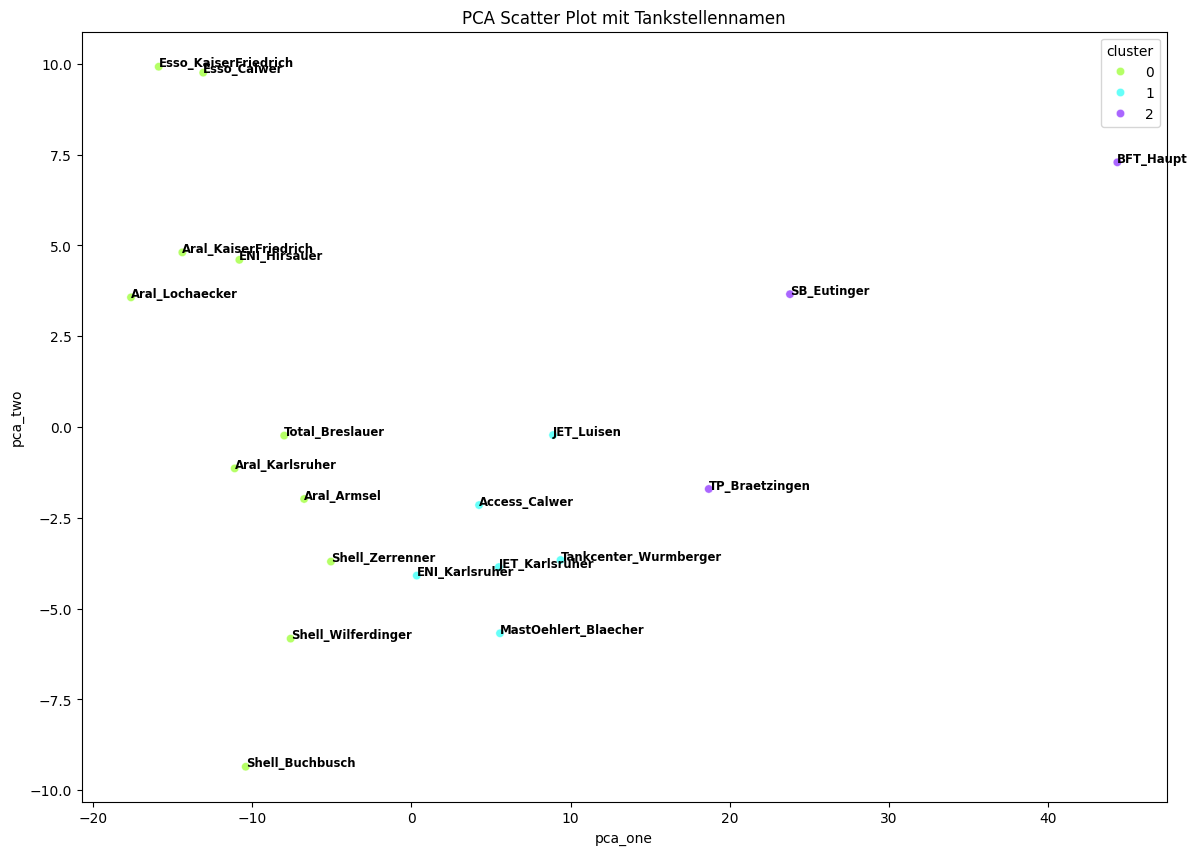

In [100]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

# PCA für die Merkmalsreduktion auf 2 Komponenten
pca = PCA(n_components=2)
pca_result = pca.fit_transform(features_scaled_df)
features_df['pca_one'] = pca_result[:, 0]
features_df['pca_two'] = pca_result[:, 1]

# Scatterplot mit Tankstellennamen
plt.figure(figsize=(14, 10))
scatter = sns.scatterplot(
    x="pca_one", y="pca_two",
    hue="cluster",
    palette=sns.color_palette("hsv", optimal_clusters),
    data=features_df,
    legend="full",
    alpha=0.6
)

# Hinzufügen der Tankstellennamen zu den Punkten
for line in range(0, features_df.shape[0]):
     scatter.text(features_df.pca_one[line], features_df.pca_two[line],
         features_df.index[line], horizontalalignment='left',
         size='small', color='black', weight='semibold')

plt.title('PCA Scatter Plot mit Tankstellennamen')
plt.show()

**Identifikation der Wettbewerber aus den Clustern**

In [101]:
# Hinzufügen des neuen Namen 'station_name' zum DataFrame features_df
merged_df['station_name'] = merged_df['station_uuid'].map(station_names).fillna(merged_df['station_uuid'])

# Aktualisierung der station_uuid-Spalte im features_df
features_df = features_df.reset_index()
features_df['station_uuid'] = features_df['station_uuid'].map(station_names).fillna(features_df['station_uuid'])
features_df.set_index('station_uuid', inplace=True)

# Clusterzugehörigkeit der angegebenen Tankstelle
target_station_id = 'Aral_Lochaecker'
target_cluster = features_df.loc[target_station_id, 'cluster']

# Identifizieren der Hauptwettbewerber
competitors = features_df[features_df['cluster'] == target_cluster].index.tolist()

# Entfernen der Ziel-Tankstelle aus der Liste der Wettbewerber
competitors.remove(target_station_id)

# Ausgabe der Wettbewerber
print(f"Hauptwettbewerber für die Tankstelle {target_station_id}:")
print(competitors)


Hauptwettbewerber für die Tankstelle Aral_Lochaecker:
['Aral_Armsel', 'Aral_KaiserFriedrich', 'Aral_Karlsruher', 'ENI_Hirsauer', 'Esso_Calwer', 'Esso_KaiserFriedrich', 'Shell_Buchbusch', 'Shell_Wilferdinger', 'Shell_Zerrenner', 'Total_Breslauer']


# Data cleansing and preprocessing für R

**Filtern nach Tankstellen in Pforzheim:**

In [ ]:
# Filtern des Datensatzes nach den IDs in ids_pf
data = raw_data[raw_data['station_uuid'].isin(ids_pf)]

In [ ]:
data.head()

**Umwandlung des Datums zur Vorbereitung der Umcodierung des Datensatzes:**
* Datumsspalte in Datumsformat umwandeln
* Zeitzone anpassen (die bisherige Zeitzone war UTC)
* Zeitzone entfernen (da alle untersuchten in derselben Zeitzone sind)
* Datum als Index setzen (erleichtert den Zugriff und somit die geplante Umwandlung)
* Index auf nächste volle Minute runden (um die Daten zu vereinheitlichen)



In [ ]:
# Step 1: Parse the 'date' column to datetime, assuming it's already timezone-aware
data['date'] = pd.to_datetime(data['date'])

# Convert to 'Europe/Berlin' timezone and then remove the timezone information
data['date'] = data['date'].dt.tz_convert('Europe/Berlin').dt.tz_localize(None)

data.set_index('date', inplace=True)

data.index = data.index.round('T')  # 'T' represents minute frequency


**Erstellung eines neuen Dataframes für die umgewandelten Daten:**
* Das neue Dataframe enthält einen Datums- und Zeitindex für jede Minute innerhalb des Untersuchunszeitraums
* Dieses Vorgehen ermöglicht konsistente Analysen

In [ ]:
# Step 2: Create a new DataFrame with a datetime index for every minute
start_date = data.index.min()
end_date = data.index.max()
all_dates = pd.date_range(start=start_date, end=end_date, freq='T')  # 'T' for minute frequency
df = pd.DataFrame(index=all_dates)

**Füllung des neuen Dataframes mit Daten:**
* In temporären Dataframes werden die Daten aus dem ursprünglichen Dateframe übernommen (also nur immer wenn sich der Preis geändert hat): Dabei gibt es ein temporäres Dateframe für jede Kombination aus Tankstelle und Kraftstoffart. Die Kombination wird durch den neuen Spaltentitel reflektiert, sodass die Daten im Nachhinein gut fusioniert werden können.
* Es werden Duplikate im Index des temporären Dataframes gelöscht, um sicherzustellen, dass jeder Zeitpunkt einzigarti ist.
* Die temporären Dataframes werden neu indiziert, um mit dem Index des gewünschten Dataframes df übereinzustimmen. Fehlende Werte werden "vorwärts gefüllt", d.h. der letzte bekannte Preis wird übernommen bei NA-Werten.
* Die Dataframes werden mit dem gewünschten Dataframe fusioniert

In [ ]:
# Step 3: Expand dataset for each station and fuel type
# Create columns for each station and fuel type
for station in data['station_uuid'].unique():
    for fuel_type in ['diesel', 'e5', 'e10']:
        # Create a temporary DataFrame for each station and fuel type
        temp_data = data[(data['station_uuid'] == station) & (data[f"{fuel_type}change"] == 1)]
        temp_data = temp_data[[fuel_type]].rename(columns={fuel_type: f"{station}_{fuel_type}"})

        # Ensure there's no duplicate index before reindexing
        temp_data = temp_data[~temp_data.index.duplicated(keep='first')]

        # Reindex the temp_data to match 'df', forward filling the missing values
        temp_data_reindexed = temp_data.reindex(df.index, method='ffill')

        # Join the reindexed data with 'df'
        df = df.join(temp_data_reindexed, how='left')

**Auffüllen der Preise:**
Dieser Code füllt fehlende Preisdaten im DataFrame df vorwärts auf.

Begründung:
Nachdem die temporären Dataframes mit dem gewünschten Dataframe zusammengeführt wurden, können weiterhin fehlende Werte auftreten. Dies liegt daran, dass nicht alle Tankstellen zu jedem Zeitpunkt Preisdaten für jeden Kraftstofftyp haben. Die Zusammenführung fügt neue Spalten zu df hinzu, aber für Zeiten, zu denen keine Preisdaten für eine bestimmte Tankstelle vorhanden waren, bleiben die Werte in diesen neuen Spalten leer.

In [ ]:
# Step 4: Forward fill the prices
df.ffill(inplace=True)

In [ ]:
df.head()

**Datum als Spalte speichern um Datentransfer zu R zu vereinfachen:**

In [ ]:
df.reset_index(inplace=True, drop=False)  # 'drop=False' ensures the index is added as a column, not discarded

In [ ]:
# Assuming you've already converted the index to a column using reset_index
df = df.rename(columns={'index': 'date'})

**Aus dem Datum die Stunde, den wochentag und die Minute extrahieren:**

In [ ]:
# Extrahierung der Stunde, Wochentag und Minute aus der konvertierten 'date'-Spalte
df['hour'] = df['date'].dt.hour
df['weekday'] = df['date'].dt.weekday
df['minute'] = df['date'].dt.minute

**Spalten umbenennen damit sie besser lesbar sind:**

In [ ]:
station_names = {
    "0be32f00-8ff4-45bf-bb4c-1588d6e03aa1": "Tankcenter_Wurmberger",
    "0dc6786a-38e4-4576-8848-335975dea87b": "Aral_Armsel",
    "3fe8dc63-1663-430f-bcc3-5bdbf281d3af": "BFT_Haupt",
    "4153a547-046a-410c-a575-968f21f1ce66": "Aral_Karlsruher",
    "615f2d73-5214-47f2-8691-e4a8134380bb": "Access_Calwer",
    "6657358a-cf8c-4d8a-b4ec-a835271041ac": "ENI_Karlsruher",
    "71ee41a5-8e67-4c50-85ab-37b95f1ec76e": "Shell_Zerrenner",
    "7a8d7a4a-a898-48c1-9420-f4a843d3d32e": "SB_Eutinger",
    "85d87996-9667-4563-be19-7dd758a9a4a0": "Esso_KaiserFriedrich",
    "94fb812e-dae2-4d1e-c4c3-d7837b468dab": "TP_Braetzingen",
    "99f5fdc2-80d8-4c38-aa04-6295d0d78f96": "Esso_Calwer",
    "a839b4f0-ec0d-474a-a839-4ada95a6ca8a": "ENI_Hirsauer",
    "b0e03550-8c80-4917-92e7-db40e975d9f2": "Shell_Buchbusch",
    "d6e30bca-f474-4e02-aef2-56bd5c2545d9": "Aral_KaiserFriedrich",
    "fbc4af15-1e1d-46ba-9a44-80c47900f3a5": "Total_Breslauer",
    "22375adc-ed7e-423b-8191-2cd266f6bcd6": "MastOehlert_Blaecher",
    "35d5f441-d930-4993-adf4-ee1abdf14000": "Shell_Wilferdinger",
    "51d4b626-a095-1aa0-e100-80009459e03a": "JET_Karlsruher",
    "51d4b6b4-a095-1aa0-e100-80009459e03a": "JET_Luisen",
    "bd27418d-c4fd-4f8a-82e5-d0cbdee60eb7": "Aral_Lochaecker"
}

# Function to apply the mapping to column names
def rename_columns(column_name):
    for uuid in station_names.keys():
        if uuid in column_name:
            # Replace UUID with a placeholder or a specific name if provided
            new_name = station_names[uuid]
            return column_name.replace(uuid, new_name if new_name else "StationNamePlaceholder")
    return column_name

# Rename the columns based on the mapping
df.columns = [rename_columns(col) for col in df.columns]

In [ ]:
df.head(10000)

# Deskriptive Statistik

Berechnung von deskriptiven Statistiken und Boxplott Preise nach Kraftstoffart, Stunde und Wochentag für unsere Aral

In [ ]:
# 2. Durchschnittliche Preise nach Stunde
average_prices_hour = df.groupby('hour').mean()

# 3. Durchschnittliche Preise nach Wochentag
average_prices_weekday = df.groupby('weekday').mean()

# 4. Standardabweichung der Preise nach Stunde
std_prices_hour = df.groupby('hour').std()

# 5. Standardabweichung der Preise nach Wochentag
std_prices_weekday = df.groupby('weekday').std()

# 6. Anzahl der Preisänderungen
price_changes = df.diff().apply(lambda x: (x != 0).sum())

# 7. Minimale und maximale Preise nach Stunde
min_prices_hour = df.groupby('hour').min()
max_prices_hour = df.groupby('hour').max()

# 8. Minimale und maximale Preise nach Wochentag
min_prices_weekday = df.groupby('weekday').min()
max_prices_weekday = df.groupby('weekday').max()

# 9. Visualisierungen
# Boxplot der Preise nach Kraftstoffart
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['Aral_Lochaecker_diesel', 'Aral_Lochaecker_e5', 'Aral_Lochaecker_e10']])
plt.title('Boxplot der Preise nach Kraftstoffart')
plt.show()


# Boxplot der Preise nach Stunde
plt.figure(figsize=(12, 6))
sns.boxplot(x='hour', y='Aral_Lochaecker_e5', data=df)
plt.title('Boxplot der Dieselpreise nach Stunde')
plt.show()

# Boxplot der Preise nach Wochentag
plt.figure(figsize=(12, 6))
sns.boxplot(x='weekday', y='Aral_Lochaecker_e5', data=df)
plt.title('Boxplot der Dieselpreise nach Wochentag')
plt.show()


Konkretisierung des Wettbewerbs auf 4 Tankstellen im Umkreis der Aral Lochäcker

In [ ]:
# Auswahl der Spalten, die die spezifischen Tankstellen enthalten
WBW_columns = [
    'date','weekday','hour', 'minute',
    'Shell_Buchbusch_diesel', 'Shell_Buchbusch_e5', 'Shell_Buchbusch_e10',
    'Aral_Lochaecker_diesel', 'Aral_Lochaecker_e5', 'Aral_Lochaecker_e10',
    'JET_Luisen_diesel', 'JET_Luisen_e5', 'JET_Luisen_e10',
    'SB_Eutinger_diesel', 'SB_Eutinger_e5', 'SB_Eutinger_e10'
]

# Extraktion der Daten in einen neuen DataFrame
WBW_df = df[WBW_columns]

# Anzeigen der ersten paar Zeilen des neuen DataFrames
WBW_df.head()


Plotten der Preise im Zeitverlauf für den engeren Wettbewerberkreis, getrennt nach Kraftstoffart

In [ ]:
# Plot für Dieselpreise
plt.figure(figsize=(14, 8))
plt.plot(WBW_df['date'], WBW_df['Shell_Buchbusch_diesel'], label='Shell Buchbusch Diesel', alpha=0.6)
plt.plot(WBW_df['date'], WBW_df['Aral_Lochaecker_diesel'], label='Aral Lochaecker Diesel', alpha=0.6)
plt.plot(WBW_df['date'], WBW_df['JET_Luisen_diesel'], label='JET Luisen Diesel', alpha=0.6)
plt.plot(WBW_df['date'], WBW_df['SB_Eutinger_diesel'], label='SB Eutinger Diesel', alpha=0.6)
plt.title('Dieselpreise im Zeitverlauf')
plt.xlabel('Datum')
plt.ylabel('Preis')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot für E5 Preise
plt.figure(figsize=(14, 8))
plt.plot(WBW_df['date'], WBW_df['Shell_Buchbusch_e5'], label='Shell Buchbusch E5', alpha=0.6)
plt.plot(WBW_df['date'], WBW_df['Aral_Lochaecker_e5'], label='Aral Lochaecker E5', alpha=0.6)
plt.plot(WBW_df['date'], WBW_df['JET_Luisen_e5'], label='JET Luisen E5', alpha=0.6)
plt.plot(WBW_df['date'], WBW_df['SB_Eutinger_e5'], label='SB Eutinger E5', alpha=0.6)
plt.title('E5 Preise im Zeitverlauf')
plt.xlabel('Datum')
plt.ylabel('Preis')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot für E10 Preise
plt.figure(figsize=(14, 8))
plt.plot(WBW_df['date'], WBW_df['Shell_Buchbusch_e10'], label='Shell Buchbusch E10', alpha=0.6)
plt.plot(WBW_df['date'], WBW_df['Aral_Lochaecker_e10'], label='Aral Lochaecker E10', alpha=0.6)
plt.plot(WBW_df['date'], WBW_df['JET_Luisen_e10'], label='JET Luisen E10', alpha=0.6)
plt.plot(WBW_df['date'], WBW_df['SB_Eutinger_e10'], label='SB Eutinger E10', alpha=0.6)
plt.title('E10 Preise im Zeitverlauf')
plt.xlabel('Datum')
plt.ylabel('Preis')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Konkretisierung des Bertachtungszeitraums auf einen bestimmten Tag

In [ ]:
# Sicherstellen, dass das Datumsformat korrekt ist
WBW_df['date'] = pd.to_datetime(WBW_df['date'])

# Datumsauswahl
selected_date = '2024-05-30'

# Daten für das ausgewählte Datum filtern
filtered_df = WBW_df[WBW_df['date'].dt.date == pd.to_datetime(selected_date).date()]

# Anzeigen der gefilterten Daten
filtered_df.head()

Plotten der Preise für den ausgewählten Tag inklusive ANzeige des Durchschnitts und der Standardabweichung für diesen Tag

In [ ]:
# Berechnung der durchschnittlichen Preise und Standardabweichungen für den ausgewählten Tag
mean_prices = filtered_df.mean()
std_prices = filtered_df.std()

# Plot für Dieselpreise mit Annotationen
plt.figure(figsize=(14, 8))
plt.plot(filtered_df['date'], filtered_df['Shell_Buchbusch_diesel'], label='Shell Buchbusch Diesel', alpha=0.6)
plt.plot(filtered_df['date'], filtered_df['Aral_Lochaecker_diesel'], label='Aral Lochaecker Diesel', alpha=0.6)
plt.plot(filtered_df['date'], filtered_df['JET_Luisen_diesel'], label='JET Luisen Diesel', alpha=0.6)
plt.plot(filtered_df['date'], filtered_df['SB_Eutinger_diesel'], label='SB Eutinger Diesel', alpha=0.6)

# Annotationen für Dieselpreise
for station in ['Shell_Buchbusch_diesel', 'Aral_Lochaecker_diesel', 'JET_Luisen_diesel', 'SB_Eutinger_diesel']:
    plt.annotate(f'Mean: {mean_prices[station]:.2f}\nStd: {std_prices[station]:.2f}',
                 xy=(filtered_df['date'].iloc[-1], filtered_df[station].iloc[-1]),
                 xytext=(10, 0), textcoords='offset points')

plt.title('Dieselpreise im Zeitverlauf am {}'.format(selected_date))
plt.xlabel('Zeit')
plt.ylabel('Preis')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot für E5 Preise mit Annotationen
plt.figure(figsize=(14, 8))
plt.plot(filtered_df['date'], filtered_df['Shell_Buchbusch_e5'], label='Shell Buchbusch E5', alpha=0.6)
plt.plot(filtered_df['date'], filtered_df['Aral_Lochaecker_e5'], label='Aral Lochaecker E5', alpha=0.6)
plt.plot(filtered_df['date'], filtered_df['JET_Luisen_e5'], label='JET Luisen E5', alpha=0.6)
plt.plot(filtered_df['date'], filtered_df['SB_Eutinger_e5'], label='SB Eutinger E5', alpha=0.6)

# Annotationen für E5 Preise
for station in ['Shell_Buchbusch_e5', 'Aral_Lochaecker_e5', 'JET_Luisen_e5', 'SB_Eutinger_e5']:
    plt.annotate(f'Mean: {mean_prices[station]:.2f}\nStd: {std_prices[station]:.2f}',
                 xy=(filtered_df['date'].iloc[-1], filtered_df[station].iloc[-1]),
                 xytext=(10, 0), textcoords='offset points')

plt.title('E5 Preise im Zeitverlauf am {}'.format(selected_date))
plt.xlabel('Zeit')
plt.ylabel('Preis')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot für E10 Preise mit Annotationen
plt.figure(figsize=(14, 8))
plt.plot(filtered_df['date'], filtered_df['Shell_Buchbusch_e10'], label='Shell Buchbusch E10', alpha=0.6)
plt.plot(filtered_df['date'], filtered_df['Aral_Lochaecker_e10'], label='Aral Lochaecker E10', alpha=0.6)
plt.plot(filtered_df['date'], filtered_df['JET_Luisen_e10'], label='JET Luisen E10', alpha=0.6)
plt.plot(filtered_df['date'], filtered_df['SB_Eutinger_e10'], label='SB Eutinger E10', alpha=0.6)

# Annotationen für E10 Preise
for station in ['Shell_Buchbusch_e10', 'Aral_Lochaecker_e10', 'JET_Luisen_e10', 'SB_Eutinger_e10']:
    plt.annotate(f'Mean: {mean_prices[station]:.2f}\nStd: {std_prices[station]:.2f}',
                 xy=(filtered_df['date'].iloc[-1], filtered_df[station].iloc[-1]),
                 xytext=(10, 0), textcoords='offset points')

plt.title('E10 Preise im Zeitverlauf am {}'.format(selected_date))
plt.xlabel('Zeit')
plt.ylabel('Preis')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Heatmap
**Erstellung einer Heatmap**

In [ ]:
# Gruppierung nach Stunde und Berechnung des Durchschnittspreises
hourly_avg_prices = filtered_df.groupby('hour').mean()

# Anzeigen der stündlichen Durchschnittspreise
hourly_avg_prices.head()

import seaborn as sns
import matplotlib.pyplot as plt

# Auswahl der zu visualisierenden Spalten
heatmap_data = hourly_avg_prices[[
    'Aral_Lochaecker_diesel','Shell_Buchbusch_diesel',  'JET_Luisen_diesel', 'SB_Eutinger_diesel',
    'Aral_Lochaecker_e10','Shell_Buchbusch_e10','JET_Luisen_e10','SB_Eutinger_e10',
    'Aral_Lochaecker_e5','Shell_Buchbusch_e5',  'JET_Luisen_e5', 'SB_Eutinger_e5'
]]

# Erstellung der Heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(heatmap_data.T, cmap='viridis', annot=True, fmt=".2f")
plt.title('Stündliche Durchschnittspreise am 2024-05-30')
plt.xlabel('Stunde')
plt.ylabel('Kraftstoff und Tankstelle')
plt.show()

Festlegung der Shell Buchbusch als Hauptkonkurrent

In [ ]:
WBW_core_columns = [
    'date','weekday','hour', 'minute',
    'Shell_Buchbusch_diesel', 'Shell_Buchbusch_e5', 'Shell_Buchbusch_e10',
    'Aral_Lochaecker_diesel', 'Aral_Lochaecker_e5', 'Aral_Lochaecker_e10'
]

# Extraktion der Daten in einen neuen DataFrame
WBW_core_df = df[WBW_core_columns]

# Sicherstellen, dass das Datumsformat korrekt ist
WBW_core_df['date'] = pd.to_datetime(WBW_core_df['date'])

# Datumsauswahl
selected_date_core = '2024-05-30'

# Daten für das ausgewählte Datum filtern
filtered_df_core = WBW_df[WBW_df['date'].dt.date == pd.to_datetime(selected_date).date()]

# Anzeigen der gefilterten Daten
filtered_df_core.head()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Auswahl der Spalten, die die spezifischen Tankstellen enthalten
WBW_core_columns = [
    'date', 'weekday', 'hour', 'minute',
    'Shell_Buchbusch_diesel', 'Shell_Buchbusch_e5', 'Shell_Buchbusch_e10',
    'Aral_Lochaecker_diesel', 'Aral_Lochaecker_e5', 'Aral_Lochaecker_e10'
]

# Extraktion der Daten in einen neuen DataFrame
WBW_core_df = df[WBW_core_columns]

# Sicherstellen, dass das Datumsformat korrekt ist
WBW_core_df['date'] = pd.to_datetime(WBW_core_df['date'])

# Datumsauswahl
selected_date_core = '2024-05-30'

# Daten für das ausgewählte Datum und die spezifische Stunde filtern
filtered_df_core = WBW_core_df[(WBW_core_df['date'].dt.date == pd.to_datetime(selected_date_core).date()) &
                               (WBW_core_df['hour'] >= 7) &
                               (WBW_core_df['hour'] < 10)]

# Pivot-Tabelle erstellen, um die Daten für die Heatmap vorzubereiten
heatmap_data_core = filtered_df_core.pivot(index='minute', columns='hour',
                                           values=[
                                               'Shell_Buchbusch_diesel', 'Shell_Buchbusch_e5', 'Shell_Buchbusch_e10',
                                               'Aral_Lochaecker_diesel', 'Aral_Lochaecker_e5', 'Aral_Lochaecker_e10'
                                           ]).T

# Erstellung der Heatmap
plt.figure(figsize=(100, 10))
sns.heatmap(heatmap_data_core, cmap='viridis', annot=True, fmt=".2f")
plt.title('Preise pro Minute von 7-8 Uhr am 2024-05-30')
plt.xlabel('Minute')
plt.ylabel('Kraftstoff und Tankstelle')
plt.show()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Auswahl der Spalten, die die spezifischen Tankstellen enthalten
WBW_core_columns = [
    'date', 'weekday', 'hour', 'minute',
    'Shell_Buchbusch_diesel', 'Shell_Buchbusch_e5', 'Shell_Buchbusch_e10',
    'Aral_Lochaecker_diesel', 'Aral_Lochaecker_e5', 'Aral_Lochaecker_e10'
]

# Extraktion der Daten in einen neuen DataFrame
WBW_core_df = df[WBW_core_columns]

# Sicherstellen, dass das Datumsformat korrekt ist
WBW_core_df['date'] = pd.to_datetime(WBW_core_df['date'])

# Datumsauswahl
selected_date_core = '2024-05-30'

# Daten für das ausgewählte Datum und den spezifischen Zeitintervall filtern
filtered_df_core = WBW_core_df[(WBW_core_df['date'].dt.date == pd.to_datetime(selected_date_core).date()) &
                               (WBW_core_df['hour'] >= 6) &
                               (WBW_core_df['hour'] < 10)]

# Vorbereitung der Daten für die Heatmap
filtered_df_core.set_index(['hour', 'minute'], inplace=True)

# Pivot-Tabelle erstellen, um die Daten für die Heatmap vorzubereiten
heatmap_data_core = filtered_df_core.pivot_table(index=['hour', 'minute'],
                                                 values=[
                                                     'Shell_Buchbusch_diesel', 'Shell_Buchbusch_e5', 'Shell_Buchbusch_e10',
                                                     'Aral_Lochaecker_diesel', 'Aral_Lochaecker_e5', 'Aral_Lochaecker_e10'
                                                 ]).T

# Erstellung der Heatmap
plt.figure(figsize=(50, 10))
sns.heatmap(heatmap_data_core, cmap='viridis', annot=True, fmt=".2f")
plt.title('Preise pro Minute von 6-11 Uhr am 2024-05-30')
plt.xlabel('Stunde und Minute')
plt.ylabel('Kraftstoff und Tankstelle')
plt.show()

In [ ]:
WBW_core_columns_diesel = [
    'date','weekday','hour', 'minute',
    'Shell_Buchbusch_diesel', 'Aral_Lochaecker_diesel'
]

# Extraktion der Daten in einen neuen DataFrame
WBW_core_df_diesel = df[WBW_core_columns_diesel]

# Sicherstellen, dass das Datumsformat korrekt ist
WBW_core_df_diesel['date'] = pd.to_datetime(WBW_core_df_diesel['date'])

# Datumsauswahl
selected_date_core_diesel = '2024-05-30'

# Daten für das ausgewählte Datum filtern
filtered_df_core_diesel = WBW_core_df_diesel[WBW_core_df_diesel['date'].dt.date == pd.to_datetime(selected_date).date()]

# Anzeigen der gefilterten Daten
filtered_df_core_diesel.head()

In [ ]:
# Auswahl der Spalten, die die spezifischen Tankstellen enthalten
WBW_core_columns_diesel = [
    'date','weekday','hour', 'minute',
    'Shell_Buchbusch_diesel', 'Aral_Lochaecker_diesel'
]

# Extraktion der Daten in einen neuen DataFrame
WBW_core_df_diesel = df[WBW_core_columns_diesel]

# Sicherstellen, dass das Datumsformat korrekt ist
WBW_core_df_diesel['date'] = pd.to_datetime(WBW_core_df_diesel['date'])

# Datumsauswahl
selected_date_core_diesel = '2024-05-30'

# Daten für das ausgewählte Datum filtern
filtered_df_core_diesel = WBW_core_df_diesel[WBW_core_df_diesel['date'].dt.date == pd.to_datetime(selected_date_core_diesel).date()]

# Differenzspalten hinzufügen
filtered_df_core_diesel['shell_dif'] = filtered_df_core_diesel['Shell_Buchbusch_diesel'].diff()
filtered_df_core_diesel['aral_dif'] = filtered_df_core_diesel['Aral_Lochaecker_diesel'].diff()

# Anzeigen der gefilterten Daten mit den Differenzspalten
print(filtered_df_core_diesel)

In [ ]:
# Auswahl der Spalten, die die spezifischen Tankstellen enthalten
WBW_core_columns_diesel = [
    'date', 'weekday', 'hour', 'minute',
    'Shell_Buchbusch_diesel', 'Aral_Lochaecker_diesel'
]

# Extraktion der Daten in einen neuen DataFrame
WBW_core_df_diesel = df[WBW_core_columns_diesel]

# Sicherstellen, dass das Datumsformat korrekt ist
WBW_core_df_diesel['date'] = pd.to_datetime(WBW_core_df_diesel['date'])

# Datumsauswahl
selected_date_core_diesel = '2024-05-30'

# Daten für das ausgewählte Datum filtern
filtered_df_core_diesel = WBW_core_df_diesel[WBW_core_df_diesel['date'].dt.date == pd.to_datetime(selected_date_core_diesel).date()]

# Differenzspalten hinzufügen
filtered_df_core_diesel['Differenz_preiszeile_aral_diesel_min2-1'] = filtered_df_core_diesel['Aral_Lochaecker_diesel'].diff() * 100  # in Cent
filtered_df_core_diesel['Aral_diesel-shell_diesel'] = (filtered_df_core_diesel['Aral_Lochaecker_diesel'] - filtered_df_core_diesel['Shell_Buchbusch_diesel']) * 100  # in Cent
filtered_df_core_diesel['Preisänderungin%'] = filtered_df_core_diesel['Aral_Lochaecker_diesel'].pct_change() * 100  # Prozentuale Preisänderung
filtered_df_core_diesel['Preisänderung'] = filtered_df_core_diesel['Aral_Lochaecker_diesel'].diff()  # Absolute Preisänderung

# Delta Zeiten der Preisänderungen berechnen
filtered_df_core_diesel['Delta_zeitenpreisänderung'] = filtered_df_core_diesel['date'].diff().apply(lambda x: x.total_seconds() / 60 if pd.notnull(x) else 0)

# Zeit bis zur nächsten Änderung berechnen
filtered_df_core_diesel['ZeitnächsteÄnderung'] = filtered_df_core_diesel['Delta_zeitenpreisänderung'].shift(-1)

# Vergleich der prozentualen Preisänderungen bei Änderung (Aral vs. Shell)
filtered_df_core_diesel['VergleichbeiderProzentePReisbeiÄnderung'] = filtered_df_core_diesel['Preisänderungin%'] - filtered_df_core_diesel['Shell_Buchbusch_diesel'].pct_change() * 100

# Anzeigen der gefilterten Daten mit den neuen Spalten
filtered_df_core_diesel.head()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sicherstellen, dass das Datumsformat korrekt ist
filtered_df_core_diesel['date'] = pd.to_datetime(filtered_df_core_diesel['date'])

# Daten für das ausgewählte Datum filtern
selected_date_core_diesel = '2024-05-30'
filtered_df_core_diesel = WBW_core_df_diesel[(WBW_core_df_diesel['date'].dt.date == pd.to_datetime(selected_date_core_diesel).date()) &
                               (WBW_core_df_diesel['hour'] >= 0) &
                               (WBW_core_df_diesel['hour'] < 24)]



# Differenzspalte hinzufügen
filtered_df_core_diesel['Differenz_preiszeile_aral_diesel_min2-1'] = filtered_df_core_diesel['Aral_Lochaecker_diesel'].diff() * 100  # in Cent

# Vorbereitung der Daten für die Heatmap
filtered_df_core_diesel_pivot = filtered_df_core_diesel.pivot_table(index='hour', columns='minute', values='Differenz_preiszeile_aral_diesel_min2-1')

# Erstellung der Heatmap
plt.figure(figsize=(500, 20))
sns.heatmap(filtered_df_core_diesel_pivot, cmap='viridis', annot=True, fmt=".2f")
plt.title('Differenz der Aral Dieselpreise pro Minute am 2024-05-30')
plt.xlabel('Minute')
plt.ylabel('Stunde')
plt.show()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sicherstellen, dass das Datumsformat korrekt ist
filtered_df_core_diesel['date'] = pd.to_datetime(filtered_df_core_diesel['date'])

# Daten für das ausgewählte Datum filtern
selected_date_core_diesel = '2024-05-30'
filtered_df_core_diesel = WBW_core_df_diesel[(WBW_core_df_diesel['date'].dt.date == pd.to_datetime(selected_date_core_diesel).date()) &
                                             (WBW_core_df_diesel['hour'] >= 6) &
                                             (WBW_core_df_diesel['hour'] < 10)]

# Differenzspalten hinzufügen
filtered_df_core_diesel['Differenz_preiszeile_aral_diesel_min2-1'] = filtered_df_core_diesel['Aral_Lochaecker_diesel'].diff() * 100  # in Cent
filtered_df_core_diesel['Differenz_preiszeile_shell_diesel_min2-1'] = filtered_df_core_diesel['Shell_Buchbusch_diesel'].diff() * 100  # in Cent

# Differenz zwischen den Preisänderungen von Aral und Shell
filtered_df_core_diesel['Differenz_Aral_Shell'] = filtered_df_core_diesel['Differenz_preiszeile_aral_diesel_min2-1'] - filtered_df_core_diesel['Differenz_preiszeile_shell_diesel_min2-1']

# Vorbereitung der Daten für die Heatmap
filtered_df_core_diesel_pivot = filtered_df_core_diesel.pivot_table(index='hour', columns='minute', values='Differenz_Aral_Shell')

# Erstellung der Heatmap
plt.figure(figsize=(50, 8))
sns.heatmap(filtered_df_core_diesel_pivot, cmap='viridis', annot=True, fmt=".2f")
plt.title('Differenz der Preisänderungen zwischen Aral und Shell pro Minute am 2024-05-30')
plt.xlabel('Minute')
plt.ylabel('Stunde')
plt.show()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sicherstellen, dass das Datumsformat korrekt ist
filtered_df_core_diesel['date'] = pd.to_datetime(filtered_df_core_diesel['date'])

# Daten für das ausgewählte Datum filtern
selected_date_core_diesel = '2024-05-30'
filtered_df_core_diesel = WBW_core_df_diesel[(WBW_core_df_diesel['date'].dt.date == pd.to_datetime(selected_date_core_diesel).date()) &
                                             (WBW_core_df_diesel['hour'] >= 0) &
                                             (WBW_core_df_diesel['hour'] < 10)]

# Differenzspalten hinzufügen
filtered_df_core_diesel['Differenz_preiszeile_aral_diesel_min2-1'] = filtered_df_core_diesel['Aral_Lochaecker_diesel'].diff() * 100  # in Cent
filtered_df_core_diesel['Differenz_preiszeile_shell_diesel_min2-1'] = filtered_df_core_diesel['Shell_Buchbusch_diesel'].diff() * 100  # in Cent

# Absolute Differenz zwischen den Preisen von Aral und Shell
filtered_df_core_diesel['Absolute_Differenz_Aral_Shell'] = (filtered_df_core_diesel['Aral_Lochaecker_diesel'] - filtered_df_core_diesel['Shell_Buchbusch_diesel']) * 100  # in Cent

# Vorbereitung der Daten für die Heatmaps
pivot_aral = filtered_df_core_diesel.pivot_table(index='hour', columns='minute', values='Differenz_preiszeile_aral_diesel_min2-1')
pivot_shell = filtered_df_core_diesel.pivot_table(index='hour', columns='minute', values='Differenz_preiszeile_shell_diesel_min2-1')
pivot_abs_diff = filtered_df_core_diesel.pivot_table(index='hour', columns='minute', values='Absolute_Differenz_Aral_Shell')

# Erstellung der Heatmaps
plt.figure(figsize=(300, 50))

plt.subplot(3, 1, 1)
sns.heatmap(pivot_aral, cmap='viridis', annot=True, fmt=".2f")
plt.title('Differenz der Aral Dieselpreise pro Minute am 2024-05-30')
plt.xlabel('Minute')
plt.ylabel('Stunde')

plt.subplot(3, 1, 2)
sns.heatmap(pivot_shell, cmap='viridis', annot=True, fmt=".2f")
plt.title('Differenz der Shell Dieselpreise pro Minute am 2024-05-30')
plt.xlabel('Minute')
plt.ylabel('Stunde')

plt.subplot(3, 1, 3)
sns.heatmap(pivot_abs_diff, cmap='viridis', annot=True, fmt=".2f")
plt.title('Absolute Differenz der Preise zwischen Aral und Shell pro Minute am 2024-05-30')
plt.xlabel('Minute')
plt.ylabel('Stunde')

plt.tight_layout()
plt.show()